<a href="https://colab.research.google.com/github/junhan-kim/Deep-Learning-Practice/blob/master/16_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from keras.utils import multi_gpu_model
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf



Using TensorFlow backend.


In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)


In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


11493376/11490434 [==============================] - 9s 1us/step


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


## kernal_size를 2,2에서 5,5로 바꾸고, MaxPooling의 pool_size를 2,2로 바꾼 후 각 cnn층 뒤에 하나씩 넣어줌.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [0]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [0]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, 
                    verbose=0, callbacks=[early_stopping_callback,checkpointer])
                                      



Epoch 00001: val_loss improved from inf to 0.06027, saving model to ./model/01-0.0603.hdf5

Epoch 00002: val_loss improved from 0.06027 to 0.03647, saving model to ./model/02-0.0365.hdf5

Epoch 00003: val_loss improved from 0.03647 to 0.03157, saving model to ./model/03-0.0316.hdf5

Epoch 00004: val_loss improved from 0.03157 to 0.02814, saving model to ./model/04-0.0281.hdf5

Epoch 00005: val_loss improved from 0.02814 to 0.02569, saving model to ./model/05-0.0257.hdf5

Epoch 00006: val_loss improved from 0.02569 to 0.01984, saving model to ./model/06-0.0198.hdf5

Epoch 00007: val_loss did not improve from 0.01984

Epoch 00008: val_loss improved from 0.01984 to 0.01900, saving model to ./model/08-0.0190.hdf5

Epoch 00009: val_loss did not improve from 0.01900

Epoch 00010: val_loss did not improve from 0.01900

Epoch 00011: val_loss improved from 0.01900 to 0.01839, saving model to ./model/11-0.0184.hdf5

Epoch 00012: val_loss did not improve from 0.01839

Epoch 00013: val_loss impro

In [0]:

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))


10000/10000 [==============================] - 1s 117us/step

 Test Accuracy: 0.9935


## 기존 Accuracy : 0.9926에서 0.9935로 약 0.0009 향상됨.

In [0]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


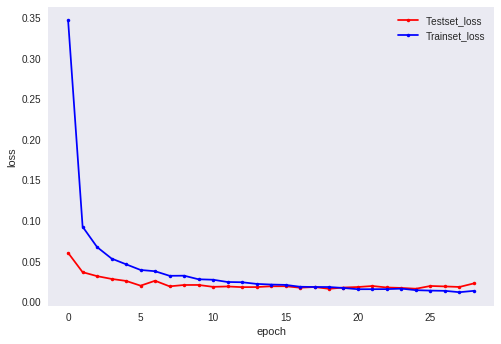

In [0]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()